# Section 6: Parameter-shift covariance matrix

Using the DR4 Lensing maps in 150 GHz and 90 GHz it is possible to undo the lensing effects in the ACTPol powerspectra.  Doing so results in a delensed spectra from which we can then obtain best-fit parameters that we compare to the best-fit parameters from the original lensed spectra.  We can measure the shift between these two sets of parameters using the parameter-shift covariance matrix which is used to determine whether the measured shift in parameters is consistent with our expectations.

In this notebook we will demonstrate how to use the lensed, delensed and parameter-shift covariance matrix to characterize this measured shift in parameters.

To return to the main notebook or to view a different section use the links in the table of contents.


## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Introduction to AdvACT Data Release 4

> [Section 2](Section_2_coadded_maps.ipynb): S08-18 Coadded maps and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps.

> [Section 6](Section_6_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters

> [Section 7](Section_7_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps.

> [Section 8](Section_8_individual_maps_and_harmonic_analysis.ipynb): Maps of Individual Patches and Harmonic Analysis using CAR maps

> [Section 9](Section_9_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 10](Section_10_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 11](Section_11_ACT_likelihood.ipynb): Using the ACT Likelihood code
 
---

We calculate the parameter shifts by using our best-fit parameters from lensed and delensed spectra. The files containing the best-fit parameters list them in the following order:

#### $\Lambda$CDM   Parameters:

| Index | Parameter    |
|-------|--------------|
| 0     | `omegabh2`   |
| 1     | `omegach2`   |
| 2     | `theta`      |
| 3     | `ns`         |
| 4     | `logA`       |
| 5     | `tau`        |


#### Foreground and Calibration Parameters:
| Index | Parameter    | Description |
|-------|--------------|-------------|
| 6     | `a_tsz_act`  | tSZ power   |
| 7     | `a_ksz_act`  | kSZ power |
| 8     | `xi_act`     | tSZ - CIB cross-correlation |
| 9     | `a_d_act`    | CIB Poisson power |
| 10    | `a_s_act`    | Radio Poisson power |
| 11    | `a_c_act`    | CIB clustered power |
| 12    | `a_g_act`    | Galactic dust |
| 13    | `a_tps_act`  | TE radio Poisson sources |
| 14    | `a_ps_act`   | EE radio Poisson sources |
| 15    | `a_gte_act`  | Dust in TE |
| 16    | `a_gee_act`  | Dust in EE |
| 17    | `beta_c_act` | CIB frequency scaling |
| 18    | `yp1_act`    | Polarization gain at 98 GHz |
| 19    | `yp2_act`    | Polarization gain at 150 GHz |

This is also the order of the entries in the parameter-shift covariance matrix, from the first to the last column.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import erfinv

Load the lensed and delensed best-fit parameters, and the parameter-shift covariance matrix.

In [4]:
lensed_best_fit_fname = '060420_lensed_best_fits_params.txt'
delensed_best_fit_fname = '060420_delensed_best_fits_params.txt'
param_shift_covmat_fname = '060320_param_shift_20x20.txt'

In [5]:
lensed_best_fit_params = np.loadtxt(path + lensed_best_fit_fname)
delensed_best_fit_params = np.loadtxt(path + delensed_best_fit_fname)
param_shift_covmat = np.loadtxt(path + param_shift_covmat_fname)

To visualize the parameter-shift covariance matrix, we can respresent it as a correlation matrix, such as in Figure 7 of Han et al. 

Note that in Figure 7 we change the order of the parameters in the matrix to better visualize the correlations between foreground parameters. Here we have just kept everything in the order listed above to avoid any confusion.

In [6]:
# calculate the correlation matrix
param_shift_std = np.sqrt(np.diag(param_shift_covmat))
outer = np.outer(param_shift_std, param_shift_std)
param_shift_corr = param_shift_covmat / outer

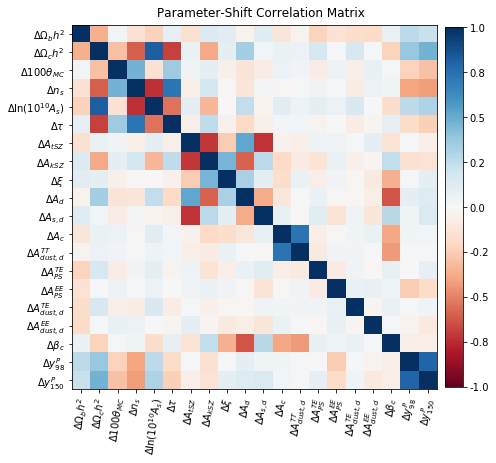

In [7]:
# define labels for the plot
labels = [r"$\Delta \Omega_b h^2$", r"$\Delta \Omega_c h^2$",
            r"$\Delta 100 \theta_{MC}$", r"$\Delta n_s$",
            r"$\Delta \ln(10^{10} A_s)$", r"$\Delta \tau$",
            r"$\Delta A_{tSZ}$", r"$\Delta A_{kSZ}$", r"$\Delta \xi$", 
            r"$\Delta A_d$", r"$\Delta A_{s,d}$", r"$\Delta A_c$", 
            r"$\Delta A^{TT}_{dust,d}$", r"$\Delta A^{TE}_{PS}$", r"$\Delta A^{EE}_{PS}$", 
            r"$\Delta A^{TE}_{dust,d}$", r"$\Delta A^{EE}_{dust,d}$", 
            r"$\Delta \beta_c$", r"$\Delta y^{P}_{98}$", r"$\Delta y^{P}_{150}$"]
label_locations = np.arange(param_shift_covmat.shape[0])
# choose a color map
cmap = plt.get_cmap('RdBu')
# make the plot
fig, ax = plt.subplots(figsize=(7,7))
fig.suptitle("Parameter-Shift Correlation Matrix")
plt.imshow(param_shift_corr, cmap=cmap, vmin=-1., vmax=1.)
# make it look nice
plt.colorbar(format='%.1f', fraction=0.046, pad=0.02)
plt.xticks(label_locations, labels, rotation=82)
plt.yticks(label_locations, labels)
# set_ylim is needed because the top and bottom rows were getting cut off; see here:
# https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
ax.set_ylim([19.5, -0.5]) 
plt.subplots_adjust(top=1.04)
plt.show()

We can calculate the shift in each parameter, defined as the difference between the lensed best-fit value and the delensed best-fit value.

In [8]:
param_shifts = lensed_best_fit_params - delensed_best_fit_params

Once we have the shifts in parameters, we can calculate the chi-squared and PTE values with our parameter shift-covariance matrix. (Note that the theoretical expectation is zero shift in parameter values.) This can be done using the shifts for all 20 parameters, or for subsets of the parameters (such as only $\Lambda$CDM parameters).

Since we calculate the covariance matrix with a finite number (300) of simulations, the estimation of the inverse of the covariance matrix is biased. We correct for this bias using the equation (17) in Hartlap et al (https://arxiv.org/abs/astro-ph/0608064). In particular, throughout Han et al, we multiply the inverse of the parameter-shift covariance matrix with a factor of (300-20-2)/(300-1).

Define a function to calculate the statistics we want:

In [9]:
def get_stats(shifts, covmat, idxs=None):
    """Calculate the chi-squared, reduced chi-squared, and PTE values 
        for a given set of parameter shifts. Also calculate the number 
        of standard deviations (sigma) by which the observed shifts deviate 
        from our expectations.
    shifts: List or numpy array of the parameter shifts.
    covmat: The parameter shift covariance matrix.
    idxs: A list of the indices of the parameters to be used in the calculation.
        For example, to use only the LCDM parameters, you would pass:
            idxs = [0, 1, 2, 3, 4, 5]
        If idxs=None, all of the parameters are used.
    Returns the chi-squared, reduced chi-squared, PTE, and sigma values."""
    
    # if necessary, trim the covariance matrix to use only the parameters requested
    if idxs is not None:
        diffs = shifts[idxs].copy()
        cov = covmat[idxs,:][:,idxs].copy()
    else:
        cov = covmat.copy()
        diffs = shifts.copy()
    
    # get the inverse covariance matrix, and apply the correction
    invcov = np.linalg.pinv(cov)
    invcov *= (300.-20.-2.)/(300.-1.) # apply correction factor
    
    # calculate chi2
    chisq = np.dot(invcov, diffs)
    chisq = np.dot(diffs.T, chisq)
    
    # calculate pte
    if idxs is None:
        dof = float(len(diffs))
    else:
        dof = float(len(idxs))
    pte = stats.chi2.sf(chisq, dof)
    
    # calculate reduced chi2
    rchisq = chisq / dof
    
    # calculate sigma
    sigma = np.sqrt(2.)*erfinv(1. - pte)
    
    return chisq, rchisq, pte, sigma

In [10]:
def print_stats(shifts, covmat, idxs=None, name=None, return_stats=False):
    """Just a helpful function to print out the stats.
    The first three arguments are the same as those in the function get_stats().
    name can be a string that identifies which parameters are being used in the calculation.
    If return_stats = True, also returns the chi-squared, reduced chi-squared, PTE, 
        and sigma values. The default is return_stats=False."""
    # do the calculation
    chi2, rchi2, pte, sigma = get_stats(shifts, covmat, idxs=idxs)
    
    # print out the results
    if idxs is None:
        num_params = len(shifts)
        name = 'All'
    else:
        num_params = len(idxs)
    print("{} ({} parameters):".format(name, num_params))
    print("{:14s} = {:6.2f}".format('chi-sq', chi2))
    print("{:14s} = {:6.2f}".format('reduced chi-sq', rchi2))
    print("{:14s} = {:6.4f}".format('PTE', pte))
    print("{:14s} = {:6.1f}".format('sigma', sigma))
    
    if return_stats:
        # return the results
        return chi2, rchi2, pte, sigma

Let's test the function first by using all of the parameters:

In [11]:
print_stats(param_shifts, param_shift_covmat)

All (20 parameters):
chi-sq         =  45.86
reduced chi-sq =   2.29
PTE            = 0.0008
sigma          =    3.3


We can also look at only $\Lambda$CDM or only foreground and calibration parameters:

In [12]:
lcdm_idxs = [0, 1, 2, 3, 4, 5]
print_stats(param_shifts, param_shift_covmat, idxs=lcdm_idxs, name='LCDM')

LCDM (6 parameters):
chi-sq         =   7.16
reduced chi-sq =   1.19
PTE            = 0.3067
sigma          =    1.0


In [13]:
fg_calib_idxs = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
print_stats(param_shifts, param_shift_covmat, idxs=fg_calib_idxs, name='FG + calibration')

FG + calibration (14 parameters):
chi-sq         =  37.26
reduced chi-sq =   2.66
PTE            = 0.0007
sigma          =    3.4


Now, we can look at various combinations.

Only extragalactic temperature parameters:

In [14]:
extragal_tt_idxs = [6, 7, 8, 9, 10, 11, 17]
print_stats(param_shifts, param_shift_covmat, idxs=extragal_tt_idxs, 
            name='Extragalactic TT FG')

Extragalactic TT FG (7 parameters):
chi-sq         =  19.26
reduced chi-sq =   2.75
PTE            = 0.0074
sigma          =    2.7


Only kSZ and tSZ x CIB correlation, and then the rest of the extragalactic temperature foregrounds separately:

In [15]:
ksz_xi_idxs = [7, 8]
print_stats(param_shifts, param_shift_covmat, idxs=ksz_xi_idxs, 
            name='kSZ and xi')

kSZ and xi (2 parameters):
chi-sq         =   0.00
reduced chi-sq =   0.00
PTE            = 1.0000
sigma          =    0.0


In [16]:
extragal_tt_other_idxs = [6, 9, 10, 11, 17]
print_stats(param_shifts, param_shift_covmat, idxs=extragal_tt_other_idxs, 
            name='Extragalactic TT FG w/o kSZ and xi')

Extragalactic TT FG w/o kSZ and xi (5 parameters):
chi-sq         =  11.37
reduced chi-sq =   2.27
PTE            = 0.0445
sigma          =    2.0


Only galactic polarization foregrounds:

In [17]:
gal_pol_idxs = [15, 16]
print_stats(param_shifts, param_shift_covmat, idxs=gal_pol_idxs, 
            name='Galactic polarization FG')

Galactic polarization FG (2 parameters):
chi-sq         =   9.26
reduced chi-sq =   4.63
PTE            = 0.0097
sigma          =    2.6


Extragalactic temperature + galactic polarization:

In [18]:
print_stats(param_shifts, param_shift_covmat, idxs=extragal_tt_idxs + gal_pol_idxs, 
            name='Extragalactic temperature + galactic polarization FG')

Extragalactic temperature + galactic polarization FG (9 parameters):
chi-sq         =  31.46
reduced chi-sq =   3.50
PTE            = 0.0002
sigma          =    3.7


All foregrounds excluding the extragalactic temperature and galactic polarization:

In [18]:
gal_tt_idxs = [12]
extragal_pol_idxs = [13, 14]
poleff_idxs = [18, 19]
print_stats(param_shifts, param_shift_covmat, idxs=gal_tt_idxs + extragal_pol_idxs + poleff_idxs, 
            name='Galactic temperature FG + extragalactic polarization FG + polarization efficiency')

Galactic temperature FG + extragalactic polarization FG + polarization efficiency (5 parameters):
chi-sq         =   3.42
reduced chi-sq =   0.68
PTE            = 0.6355
sigma          =    0.5
